# Example of running ngspice in Google Colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hung-chi/ekv2.6/blob/develop/docs/notebooks/example_colab.ipynb)

---
THis notebook gives the example of running circuit simulation on Colab using Ngpsice. Additionally, the notebook also shows how to compile Verilog-A to OSDI format that is included in Ngspice.

> [!NOTE]
> If your operating system is Linux, you can also follow this notebook.

## Installation

It is required to install OpenVAF and Ngspice. The former compiles Verilog-A transistor compact model, and the latter performs the SPICE simulation. 

> [!NOTE]
> If OSDI file generated by OpenVAF in Windows system, it can not be used in Colab since Colab's operating system is the Ubuntu distribution of Linux.

### OpenVAF

The latest OpenVAF is available from [here](https://openvaf.semimod.de/download/). Try to run the next cell to download the compressed OpenVAF software. 

In [ ]:
!wget https://openva.fra1.cdn.digitaloceanspaces.com/openvaf_23_5_0_linux_amd64.tar.gz -O openvaf_isntall.tar.gz

Once it is downloaded, we need to uncompress it and add the executable file to the PATH.

In [ ]:
!tar -xvzf openvaf_install.tar.gz
!mv openvaf ../usr/local/bin

Try the command to check whether OpenVAF is successfully added.

In [ ]:
!openvaf --version

### Ngspice
In this notebook, we install the latest Ngspice (version 43) from the source to have the updated OSDI interface, while the newest version available on conda is v41. The Ngspice installation from the source will take around 8 minutes. This might be faster and simpler when the newer version is available on conda. 

Download and extract the Ngsice:

In [ ]:
!wget https://sourceforge.net/projects/ngspice/files/ng-spice-rework/43/ngspice-43.tar.gz
!tar -zxvf ngspice-43.tar.gz

Install the Ngspice:

In [ ]:
!apt-get install -y build-essential libtool automake autoconf bison flex gfortran libx11-dev libxaw7-dev libreadline-dev libfftw3-dev libpng-dev libjpeg-dev
%cd ngspice-43
! ./configure --with-x11
! make clean
! make
! make install
%cd ..

Check the installation of Ngspice:

In [ ]:
!ngspice --version

## Compile Verilog-A model

The EKV2.6 Verilog-A model is available in the git repository, [VA-Models](https://github.com/dwarning/VA-Models). We can then clone the project:

In [ ]:
!git clone https://github.com/dwarning/VA-Models.git

Once it is cloned to Colab successfully, try next cell to compile EKV2.6 Verilog-A model to OSDI:

%cd VA-Models/code
!mkdir -p ../osdilibs
!openvaf -D__NGSPICE__ -o ../osdilibs/ekv26.osdi ../code/ekv/vacode/ekv26.va
%cd ../..

## Simulation
### modelCard
The next cell will write the model card that will be used in the simulation.

In [ ]:
%%writefile ekv26_modelcard.par

*** SPICE Models
*** Models created by Daniel Foty.
*** (c) 2001, Gilgamesh Associates and EPFL – All rights reserved.
*** These models are provided without warranty or support.
*** These models represent a completely fictitious 0.15um process, and do
*** NOT correspond to any real silicon process. They are provided expressly for
*** use in the examples provided in this text, and should not be used for any 
*** real silicon product design.
*** NMOS EKV MOSFET Model ***************************************************
*** Level=44 in WinSPICE and ELDO, Level=55 in ADM/HSPICE, Level=5 in PSPICE, 
*** Level=EKV in Spectre
*** Lmin=0.15u Wmin=1.05u (If Scale=0.15u then Lmin=1 and Wmin=7)
*—————
.MODEL nmos EKV26_VA
*+ LEVEL=44
+ TYPE = 1
*** Setup Parameters
+ UPDATE=2.6
*** Process Related Model Parameters
+ COX=9.083E-3 XJ=0.15E-6
*** Intrinsic Model Parameters
+ VTO=0.4 GAMMA=0.71 PHI=0.97 KP=453E-6
+ E0=88.0E6 UCRIT=4.0E6 
+ DL=-0.05E-6 DW=-0.02E-6
+ LAMBDA = 0.30 LETA=0.28 WETA=0
+ Q0=280E-6 LK=0.5E-6
*** Substrate Current Parameters
+ IBN=1.0 IBA=200E6 IBB=350E6
*** Intrinsic Model Temperature Parameters
+ TNOM=27.0 TCV=1.5E-3 BEX=-1.5 UCEX=1.7 IBBT=0
*** 1/f Noise Model Parameters
+ KF=1E-27 AF=1
*** Series Resistance and Area Calculation Parameters
+ HDIF=0.24e-6 ACM=3 RSH=5.0 RS=1250.526
+ RD=1250.526 LDIF=0.07e-6
*** Junction Current Parameters
+ JS=1.0E-6 JSW=5.0E-11 XTI=0 N=1.5
*** Junction Capacitances Parameters
+ CJ=1.0E-3 CJSW=2.0E-10 CJGATE=5.0E-10
+ MJ=0.5 MJSW=0.3 PB=0.9 PBSW=0.9 FC=0.5
*** Gate Overlap Capacitances
+ CGSO=3.0E-10 CGDO=3.0E-10 CGBO=3.0E-11
 
*** PMOS EKV MOSFET Model ***************************************************
*** Level=44 in WinSPICE and ELDO, Level=55 in ADM/HSPICE, Level=5 in PSPICE, 
*** Level=EKV in Spectre
*** Lmin=0.15u Wmin=1.05u (If Scale=0.15u then Lmin=1 and Wmin=7)
*—————
.MODEL pmos EKV26_VA
*+ LEVEL = 44
+ TYPE = -1
*** Setup Parameters
+ UPDATE = 2.6
*** Process Related Model Parameters
+ COX=9.083E-3 XJ=0.15E-6
*** Intrinsic Model Parameters
+ VTO=-0.4 GAMMA=0.69 PHI=0.87 KP=92.15E-6
+ E0=51.0E6 UCRIT=18.0E6
+ DL=-0.05E-6 DW=-0.03E-6
+ LAMBDA=1.1 LETA=0.45 WETA=0
+ Q0=200E-6 LK=0.6E-6
*** Substrate Current Parameters 
+ IBN=1.0 IBA=0.0 IBB=300E6 
*** Intrinsic Model Temperature Parameters 
+ TNOM=25.0 TCV=-1.4E-3 BEX=-1.4 UCEX=2.0 IBBT=0.0 
*** 1/f Noise Model Parameters 
+ KF=1.0E-28 AF=1 
*** Series Resistance and Area Calculation Parameters
+ HDIF=0.24E-6 ACM=3 RSH=5.0 RS=3145.263
+ RD=3145.263 LDIF=0.07e-6
*** Junction Current Parameters
+ JS=1.0E-7 JSW=5.0E-12 XTI=0 N=1.8 
*** Junction Capacitances Parameters 
+ CJ=1.3E-3 CJSW=2.5E-10 CJGATE=5.5E-10 
+ MJ=0.5 MJSW=0.35 PB=0.9 PBSW=0.9 FC=0.5 
*** Gate Overlap Capacitances 
+ CGSO=3.2E-10 CGDO=3.2E-10 CGBO=3.0E-11


### Netlist
Try the next cell to write the netlist of transistor simulation.

In [ ]:
%%writefile netlist.sp
*.options abstol=1e-15

* one voltage source per MOS terminal:
VD d 0 dc 0.01
VG g 0 dc 0
VS s 0 dc 0
VB b 0 dc 0

* model definitions:
.include ./ekv26_modelcard.par

* OSDI EKV:
N1 d g s b nmos W=5e-6 L=0.15e-6

.control
pre_osdi VA-Models/osdilibs/ekv26.osdi
set wr_singlescale
set wr_vecnames
set xbrushwidth=3
dc Vg 0 3 0.01 Vd 0 3 0.05
wrdata output.txt all
.endc

.end

Finally, execute the next cell to run the batch simulation.

In [ ]:
! ngspice -b netlist.sp

## Results

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Read the output from Ngsice

In [2]:
df = pd.read_csv("output.txt", sep='\s+', header=0)
cols = df.columns.values
new_cols = []
for col in cols:
    if col.startswith('v'):
        if col.endswith('branch'):
            col = col.replace('#branch', "").replace('v', 'i')
    else:
        col = 'v' + col

    new_cols.append(col)
df.columns = new_cols
df

,v-sweep,vb,vd,vg,vs,v-sweep.1,ib,id,ig,is
0,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000e+00,0.0,0.000000e+00
1,0.01,0.0,0.0,0.01,0.0,0.01,0.000000,0.000000e+00,0.0,0.000000e+00
2,0.02,0.0,0.0,0.02,0.0,0.02,0.000000,4.881482e-26,0.0,-4.881482e-26
3,0.03,0.0,0.0,0.03,0.0,0.03,0.000000,0.000000e+00,0.0,0.000000e+00
4,0.04,0.0,0.0,0.04,0.0,0.04,0.000000,-4.850448e-26,0.0,4.850448e-26
...,...,...,...,...,...,...,...,...,...,...
18356,2.96,0.0,3.0,2.96,0.0,2.96,0.000008,-7.915005e-03,0.0,7.906816e-03
18357,2.97,0.0,3.0,2.97,0.0,2.97,0.000008,-7.942567e-03,0.0,7.934429e-03
18358,2.98,0.0,3.0,2.98,0.0,2.98,0.000008,-7.970076e-03,0.0,7.961989e-03
18359,2.99,0.0,3.0,2.99,0.0,2.99,0.000008,-7.997532e-03,0.0,7.989497e-03


### Plot

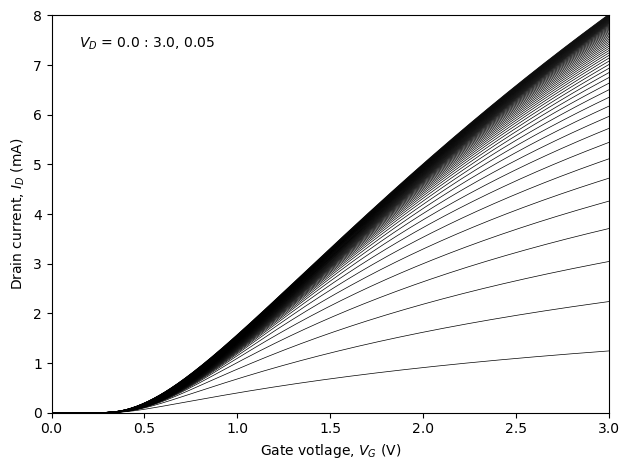

In [3]:
ax = plt.gca()
vds = df.vd.unique()
for vd in vds:
    _df = df[df.vd == vd]
    ax.plot(_df.vg, -_df.id*1E3, 'k-', lw=0.5)
ax.set_yscale('linear')
ax.set_ylabel('Drain current, $I_D$ (mA)')
ax.set_xlabel('Gate votlage, $V_G$ (V)')
ax.set_xlim(0, 3)
ax.set_ylim(0, 8)
ax.text(0.05, 0.95, s=f'$V_D$ = {vds[0]} : {vds[-1]}, {np.diff(df.vd.unique())[0]}',
       ha='left', va='top', transform=ax.transAxes)
plt.tight_layout()